<a href="https://colab.research.google.com/github/kachhadiyaraj15/pytorch_deep_learning/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.0.1+cu118'

In [4]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)  # unsqueeze create (nx1) dataset due to dim=1
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [6]:
# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [7]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
  """
  plots trainings data, test data and compares predictions.
  """
  plt.figure(figsize = (10,7))

  # plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label = "Training data")

  # plot test data in blue
  plt.scatter(test_data, test_labels, c="g", s=4, label = "Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label = "Predicted data")

  # Show the legend
  plt.legend(prop = {"size":14})



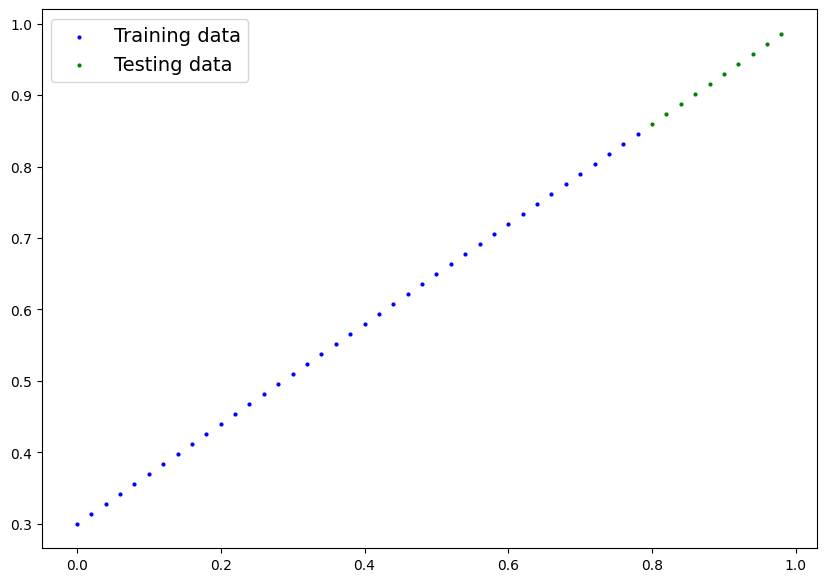

In [9]:
plot_predictions()

### 2. Build Model



In [31]:
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                requires_grad=True) # <- can we update this value with gradient descent?)

    self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                        dtype=torch.float), # <- PyTorch loves float32 by default
                            requires_grad=True) # <- can we update this value with gradient descent?))

  # Forward defines the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
    return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)

In [32]:
# Set manual seed since nn.Parameter are randomly initialzied
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = LinearRegressionModel()

# Check the nn.Parameter(s) within the nn.Module subclass we created
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [33]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [35]:
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

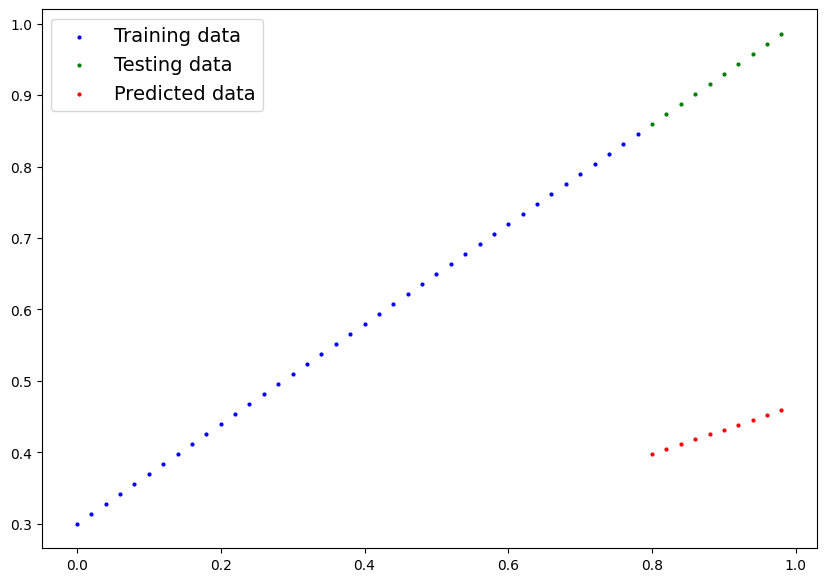

In [37]:
plot_predictions(predictions = y_preds)

### Question: What is difference between inference_mode and no_grad?
- Both are same but Inference mode is useful in some cases.

In [38]:
# with torch.inference_mode():
#   y_preds = model_0(X_test)

with torch.no_grad():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [40]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01)

In [41]:
epochs = 1

for i in range(epochs):
  # Set the model into trainig mode
  model_0.train()

  #1. Forward Pass
  y_pred = model_0(X_train)

  #2. loss calculation
  loss = loss_fn (y_pred, y_train)

  #3. Optimizer zero grad
  optimizer.zero_grad()

  #4. Backpropagation on the loss function
  loss.backward()

  #5. Optimization step
  optimizer.step()


  model_0.eval()